In [32]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import joblib

In [2]:
# Load the datasets
train_df=pd.read_csv("titanic_train.csv")
test_df=pd.read_csv("titanic_test.csv")

In [3]:
# Display the first few rows of the training dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display basic information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary statistics of the training data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values in the training dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

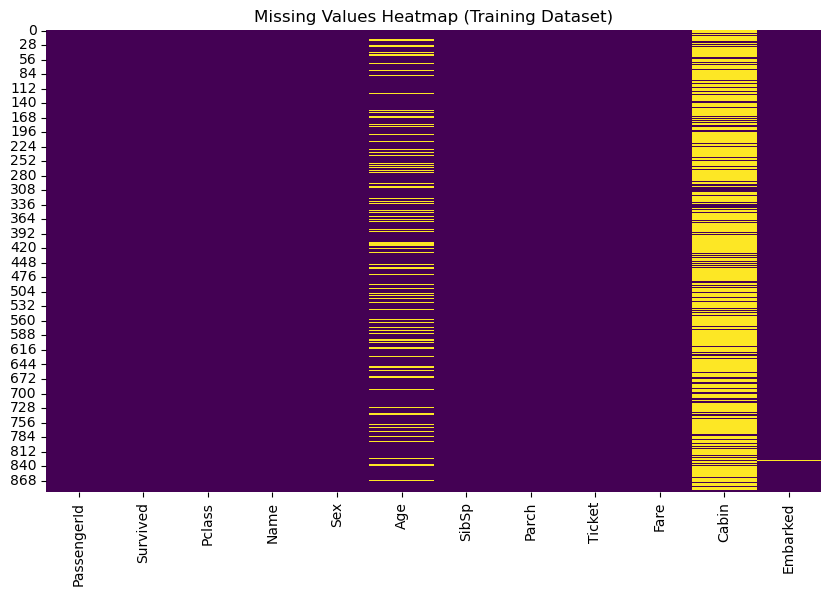

In [7]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Training Dataset)')
plt.show()

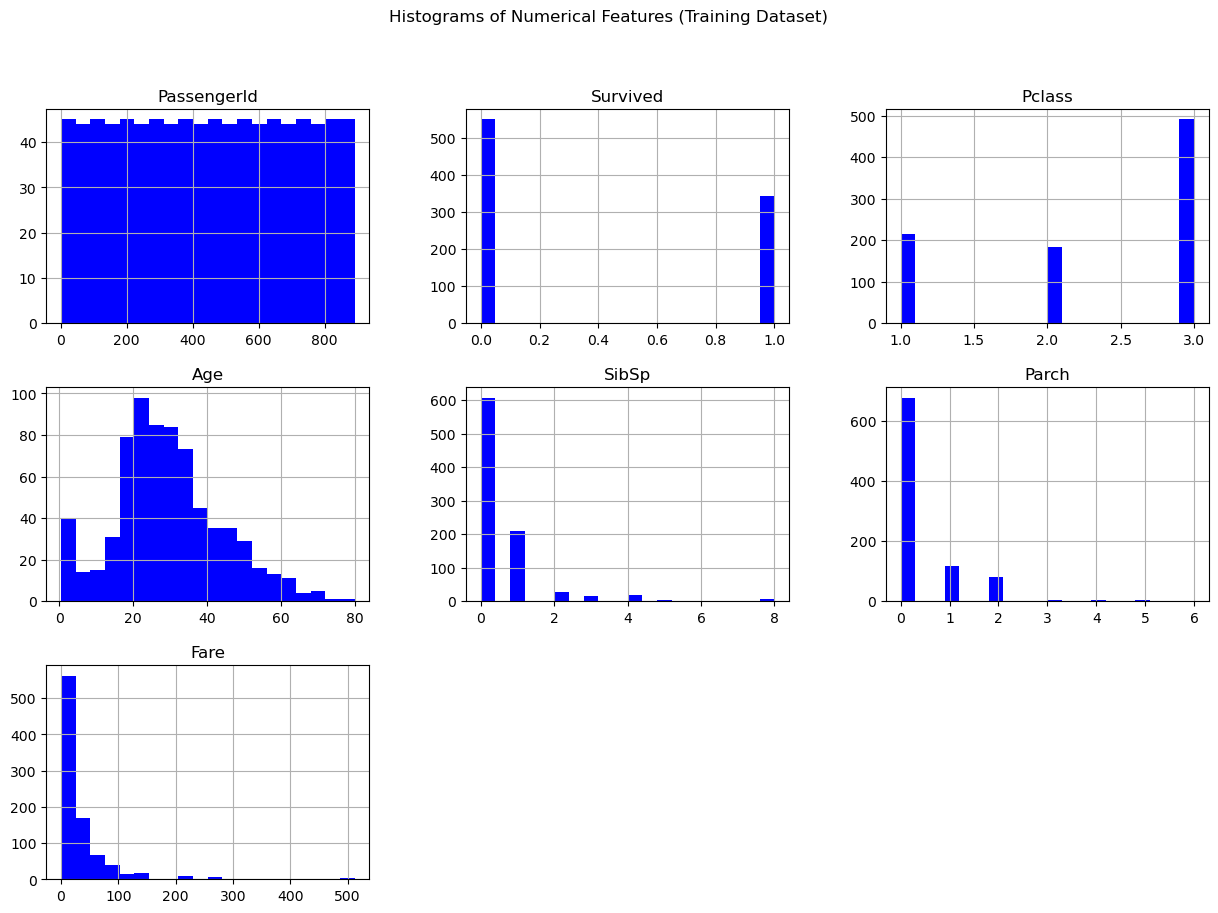

In [8]:
# Visualize the distribution of numerical features using histograms
train_df.hist(bins=20, figsize=(15, 10), color='blue')
plt.suptitle('Histograms of Numerical Features (Training Dataset)')
plt.show()

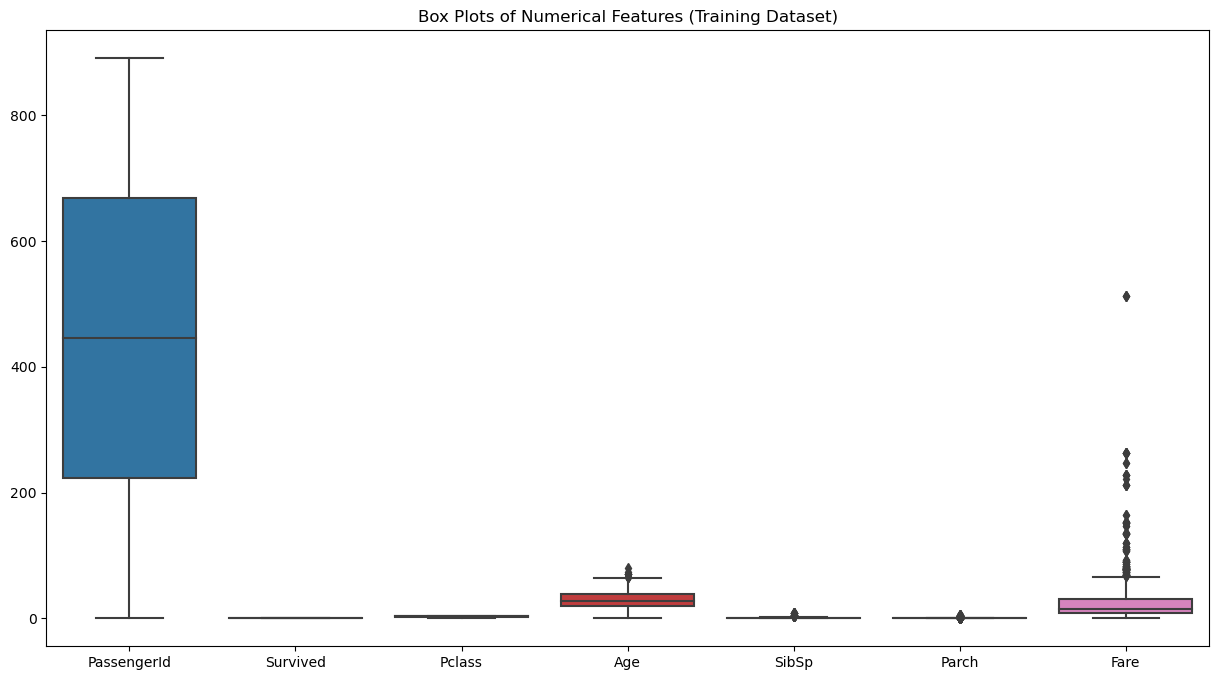

In [9]:
# Box plot of numerical features to detect outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plots of Numerical Features (Training Dataset)')
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


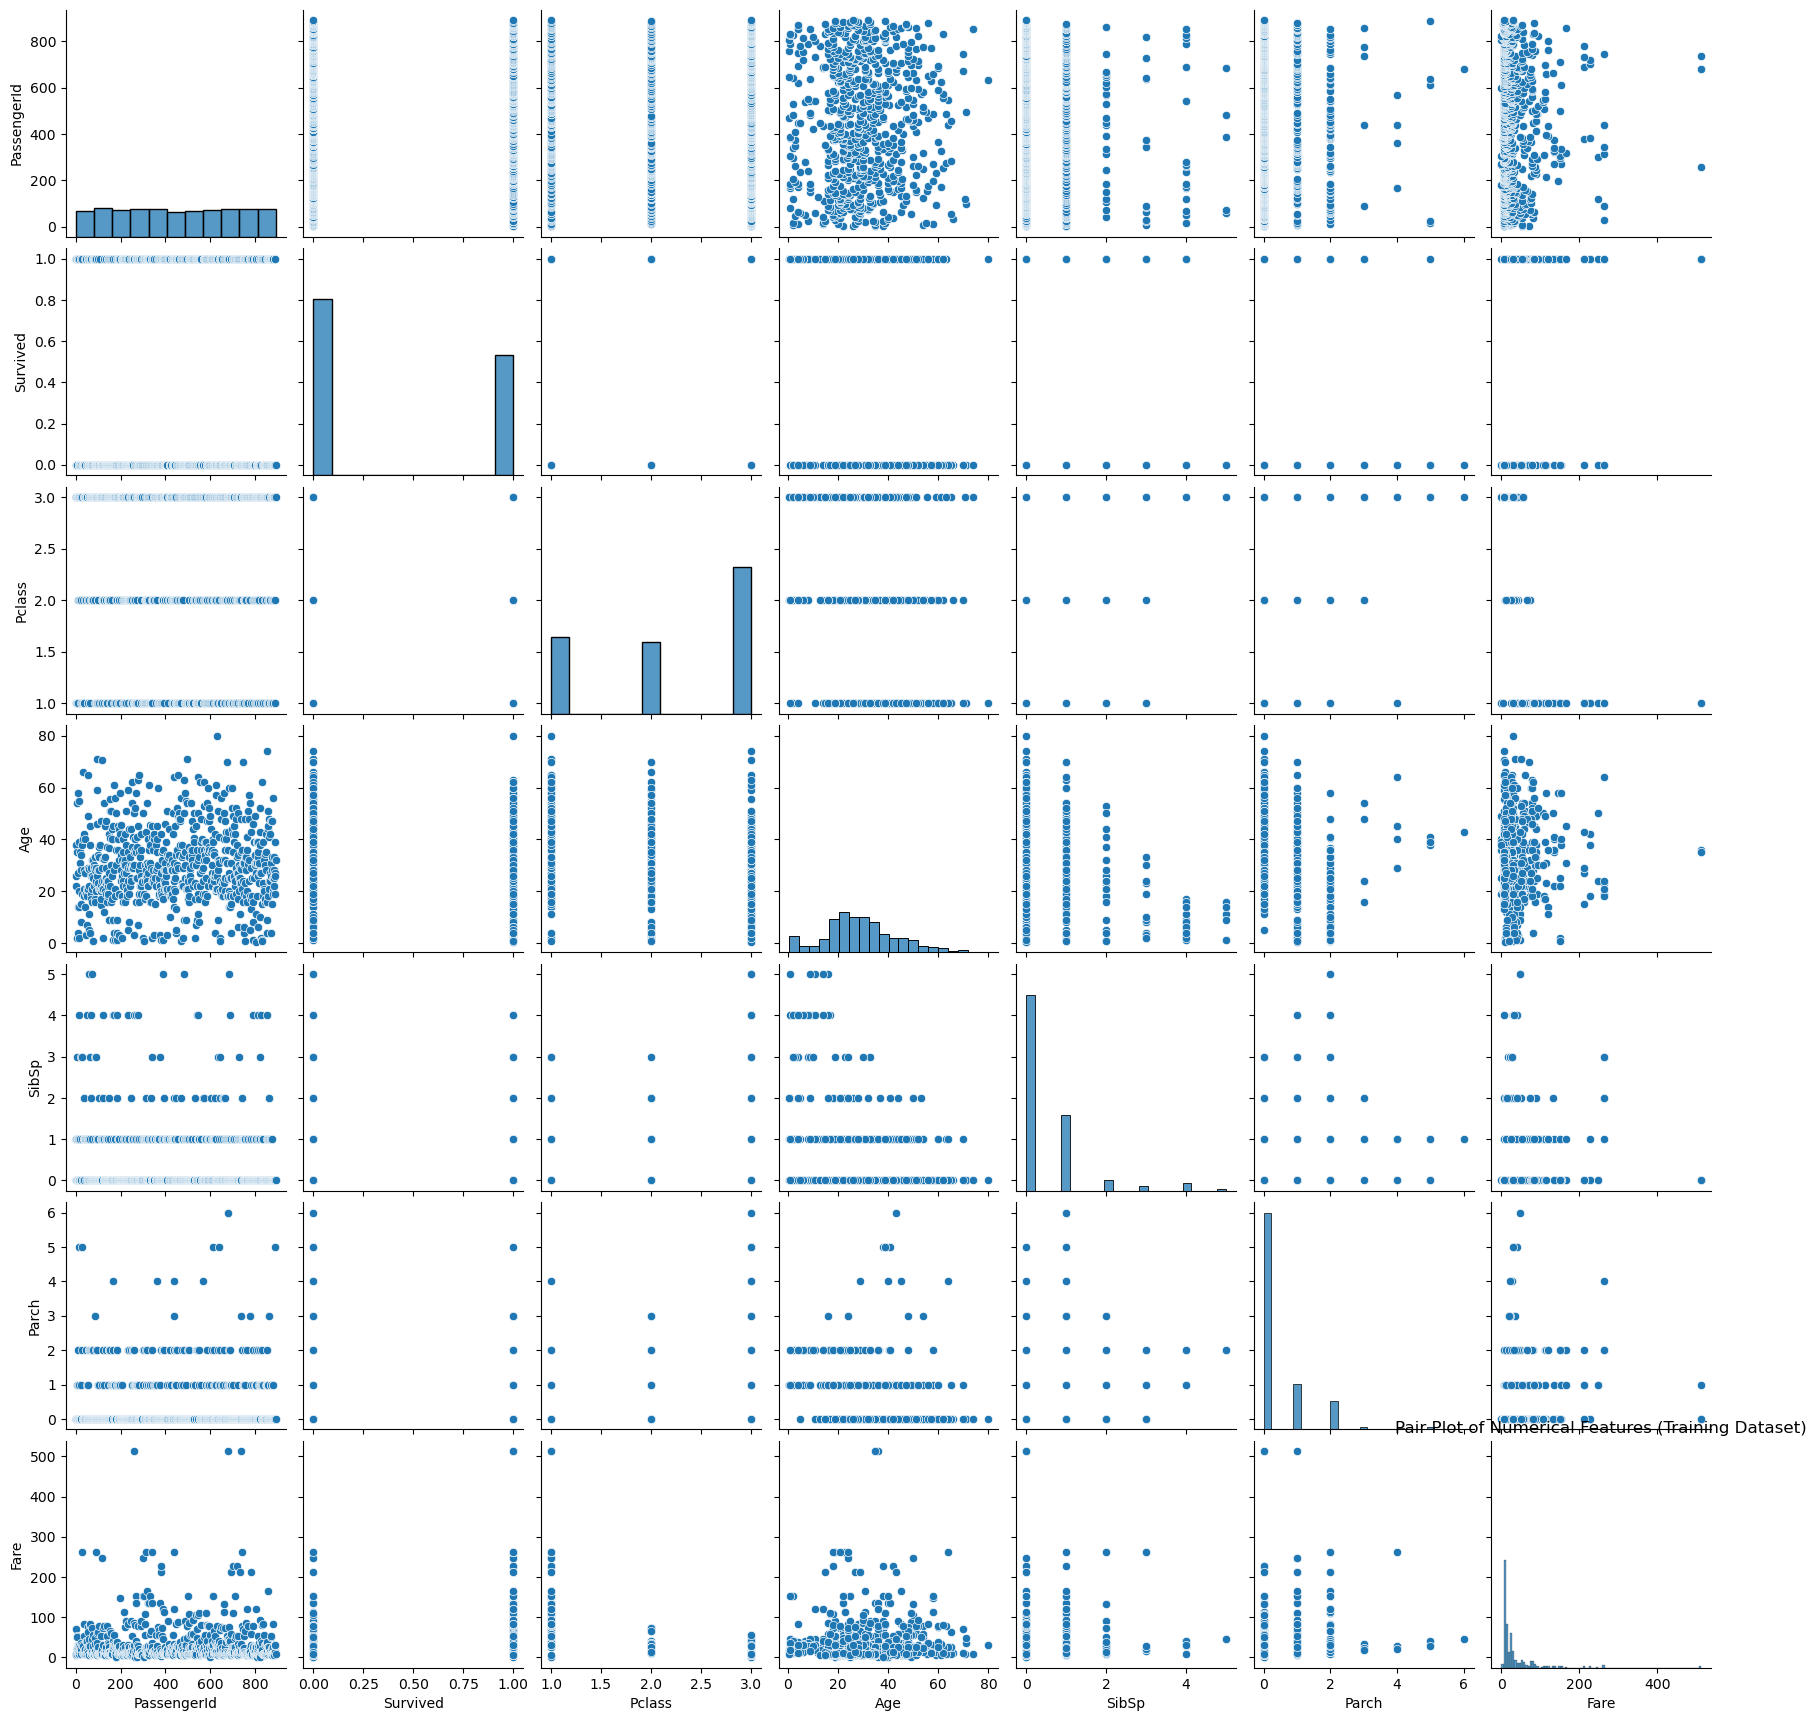

In [10]:
# Pair plot to visualize relationships between numerical features
sns.pairplot(train_df.select_dtypes(include=['float64', 'int64']).dropna())
plt.title('Pair Plot of Numerical Features (Training Dataset)')
plt.show()

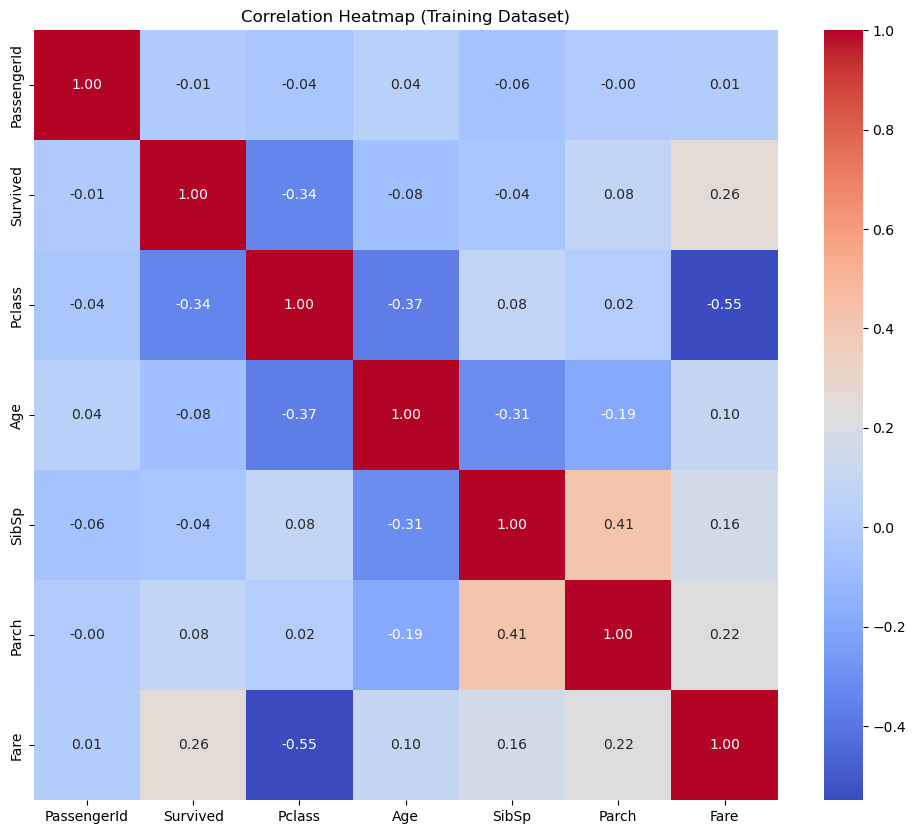

In [12]:
# Select only numeric columns for correlation heatmap
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Training Dataset)')
plt.show()


In [13]:
# Create a copy of the dataset for preprocessing
train_df_preprocessed = train_df.copy()

In [14]:
# Impute missing values for 'Age' with the median
imputer = SimpleImputer(strategy='median')
train_df_preprocessed['Age'] = imputer.fit_transform(train_df_preprocessed[['Age']])

In [15]:
# Impute missing values for 'Embarked' with the most frequent value
train_df_preprocessed['Embarked'] = train_df_preprocessed['Embarked'].fillna(train_df_preprocessed['Embarked'].mode()[0])

In [16]:
# Drop 'Cabin' column due to too many missing values
train_df_preprocessed.drop(columns=['Cabin'], inplace=True)

In [17]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_df_preprocessed['Sex'] = label_encoder.fit_transform(train_df_preprocessed['Sex'])
train_df_preprocessed['Embarked'] = label_encoder.fit_transform(train_df_preprocessed['Embarked'])

In [18]:
# Drop irrelevant columns
train_df_preprocessed.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [19]:
# Display the first few rows of the preprocessed training dataset
print("Preprocessed Training Dataset Head:")
print(train_df_preprocessed.head())

Preprocessed Training Dataset Head:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [20]:
# Check for missing values after preprocessing
print("\nMissing Values After Preprocessing:")
print(train_df_preprocessed.isnull().sum())


Missing Values After Preprocessing:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [21]:
# Define the target variable (Survived) and features
X = train_df_preprocessed.drop('Survived', axis=1)  # Features
y = train_df_preprocessed['Survived']  # Target variable

In [22]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=200)

In [24]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [25]:
# Output the model coefficients
print("Model Coefficients:")
print(logreg.coef_)

Model Coefficients:
[[-9.30726545e-01 -2.59670895e+00 -3.04300469e-02 -2.93864909e-01
  -1.11820848e-01  2.53307246e-03 -2.18847907e-01]]


In [27]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [28]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [29]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC-AUC Score: 0.88


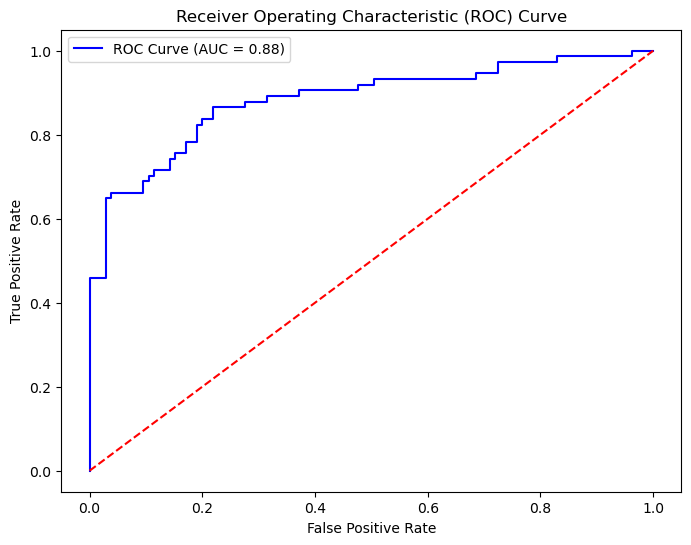

In [30]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [31]:
# Print model coefficients with corresponding feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


    Feature  Coefficient
5      Fare     0.002533
2       Age    -0.030430
4     Parch    -0.111821
6  Embarked    -0.218848
3     SibSp    -0.293865
0    Pclass    -0.930727
1       Sex    -2.596709


In [34]:
# Save the model
joblib.dump(logreg, 'titanic_logreg_model.pkl')

['titanic_logreg_model.pkl']

In [ ]:
# 1. Precision vs Recall

# Precision: Measures how many of the predicted positives are actually true positives.
# Recall: Measures how many of the actual positives were correctly identified.

# 2. Cross-Validation

# Cross-validation is a technique to assess the model's performance by splitting the data
# into multiple parts and training/testing on different combinations. It helps to ensure 
# that the model generalizes well to unseen data and isn’t overfitting.